In [22]:
import pandas as pd
import anndata
import joblib
import pybedtools
import seaborn as sns
import pyBigWig
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.5
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth - 0.2)
rc('ytick.minor', width=linewidth - 0.2)

## Load

In [13]:
cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_tidy_data = pd.read_msgpack('/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg')
subtype_to_cell_class = cell_tidy_data.set_index('SubType')['CellClass'].to_dict()





/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
def hex_to_rgb(h):
    return tuple(int(h[1:][i:i+2], 16) for i in (0, 2, 4))

In [17]:
cluster_order = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/study/CompareREPTILE/EnhancerDevProfile/SubtypeOrder.txt',
    header=None,
    index_col=0).index

In [31]:
cell_class_img = np.array([hex_to_rgb(cell_class_palette[subtype_to_cell_class[c.replace('_', ' ')]])
 for c in cluster_order])[None, :, :]
subtype_img = np.array([hex_to_rgb(sub_type_palette[c.replace('_', ' ')])
 for c in cluster_order])[None, :, :]


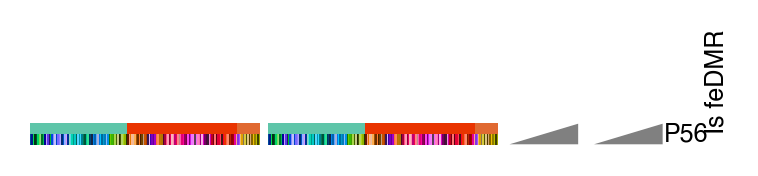

In [48]:
fig = plt.figure(figsize=(3, 0.1), dpi=300)

gs = fig.add_gridspec(2, 91, hspace=0)

adult_cg_ax1 = fig.add_subplot(gs[0, :30])
adult_cg_ax2 = fig.add_subplot(gs[1, :30])
adult_atac_ax1 = fig.add_subplot(gs[0, 31:61])
adult_atac_ax2 = fig.add_subplot(gs[1, 31:61])
dev_cg_ax = fig.add_subplot(gs[:, 62:72])
dev_k27_ax = fig.add_subplot(gs[:, 73:83])
adult_k27_ax = fig.add_subplot(gs[:, 84:87])
fedmr_ax = fig.add_subplot(gs[:, 88:91])

ax = adult_cg_ax1
ax.imshow(cell_class_img, aspect='auto')
ax.axis('off')
ax = adult_cg_ax2
ax.imshow(subtype_img, aspect='auto')
ax.axis('off')

ax = adult_atac_ax1
ax.imshow(cell_class_img, aspect='auto')
ax.axis('off')
ax = adult_atac_ax2
ax.imshow(subtype_img, aspect='auto')
ax.axis('off')

ax = dev_cg_ax
ax.fill_between((0, 1), (0, 1), fc='gray')
ax.axis('off')
ax = dev_k27_ax
ax.fill_between((0, 1), (0, 1), fc='gray')
ax.axis('off')

ax = adult_k27_ax
ax.text(0.5, 0.5, 'P56', fontsize=labelsize, ha='center', va='center')
ax.axis('off')

ax = fedmr_ax
ax.text(0.5, 0.5, 'Is feDMR', fontsize=labelsize, ha='center', va='bottom', rotation=90)
ax.axis('off')

fig.savefig(f'Legend.pdf')

In [36]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_